<a href="https://colab.research.google.com/github/dewonlupin/CSc173-Project/blob/main/DataCleanupMC-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSc-173: VAST Mini Challenge-1 
---

### Importing the data

In [ ]:
import io
import pandas as pd
import json
from google.colab import files
import numpy as np


In [ ]:
data = files.upload()

Saving MC1.json to MC1 (1).json


### Data Cleansing 

In [ ]:
jString = data['MC1.json'].decode('utf-8')
json_data = json.loads(jString)

# creating seperate dictionary for nodes 
nodes = json_data['nodes']
# creating seperate dictionary for links 
links = json_data['links']

In [ ]:
# creating dataframe of nodes from dictionary
df_nodes = pd.DataFrame(nodes)
# creating dataframe of links from dictionary
df_links = pd.DataFrame(links) 

In [ ]:
# deleting "dataset" from nodes as it has no significance
df_nodes = df_nodes.drop('dataset', axis=1) 
# deleting "dataset" from link as it has no significance
df_links = df_links.drop('dataset', axis=1)

In [ ]:
# converting all columns of node_df to strings
node_columns = df_nodes.columns
for columns in node_columns:
  df_nodes[columns] = df_nodes[columns].astype(str)

# conveting selected columns to string in link dataframe or,
# we can convert all columns into string to ease the comparrision and plotting
links_columns = df_links.columns
for columns in links_columns:
  df_links[columns] = df_links[columns].astype(str)

In [ ]:
df_links

,type,weight,source,target,key
0,ownership,0.90013963,Spanish Shrimp Carriers,12744,0
1,partnership,0.8458973,Spanish Shrimp Carriers,21323516,0
2,partnership,0.9648761,Spanish Shrimp Carriers,290834957,0
3,ownership,0.9642126,Spanish Shrimp Carriers,3506021,0
4,family_relationship,0.82348585,Spanish Shrimp Carriers,Conventionâ,0
...,...,...,...,...,...
11064,family_relationship,0.8177724,Ocano del Este SE,Mary Clements,0
11065,partnership,0.8735374,Norwegian Shrimp N.V. -,67261634,0
11066,partnership,0.849333,Norwegian Shrimp N.V. -,344,0
11067,membership,0.8142165,Malabar Sea Catch Sp,672,0


In [ ]:
# function that determines whether each rows is a string or not 
# input   : dataframe 
# returns : Boolean value
# True    : all rows are string, 
# False   : some or all rows are not string)
def isString(data):
  flag = True
  faulty = []
  columns = data.columns
  for col in columns:
    for rows in data[col]:
      if type(rows) != str:
        flag = False
        faulty.append(col+": "+rows+ " is not string")
  return flag

In [ ]:
# check if each rows are string in nodes
print("Each rows in each columns of Nodes is string:", isString(df_nodes))
print("Each rows in each columns of Links is string:", isString(df_links))

Each rows in each columns of Nodes is string: True
Each rows in each columns of Links is string: True


In [ ]:
print("Nodes")
print("--------------")
print(df_nodes.dtypes)
print("--------------")
print("--------------")
print("\nLinks")
print("--------------")
print(df_links.dtypes)
print("--------------")
print("--------------")

Nodes
--------------
type       object
country    object
id         object
dtype: object
--------------
--------------

Links
--------------
type      object
weight    object
source    object
target    object
key       object
dtype: object
--------------
--------------


### Selecting the entities to investigate
  1. Mar de la Vida OJSC
  2. 979893388
  3. Oceanfront Oasis Inc Carrie[Typo](Should be: Oceanfront Oasis Inc Carriers)
  4. 8327

In [ ]:
entities = ["Mar de la Vida OJSC","979893388", 
            "Oceanfront Oasis Inc Carriers", "8327"]

In [ ]:
entities

['Entities to investigate',
 'Mar de la Vida OJSC',
 '979893388',
 'Oceanfront Oasis Inc Carrie',
 '8327']

### Logic:
  - Basis: We have to find out any company that is illegally, unreportedly, and unregulatedly selling fishes.  


  - ##### Directed multi-graph: 
    - As the data is a DMG which means multiple edges between the same two nodes are possible.
    - Hence, we need to find the link between entities to all other nodes.
    - In-short, we cannot drop everything appart from these entities. 
  ---


In [ ]:
# ------- psuedocode -------
# linksOfLinks(node, links):
#   [1]. find the index of rows which contains the entities in link.source
#   [2]. append parllel rows of same data from link.target in susp_source
#   [3]. do [1] and [2] for link.target append in susp_target
#   [4]. extract the unique values from susp_target and susp_source
#   [5]. drop the values that are not present in [4] from node.columns
#   [6]. returns new_node, new_link

In [ ]:
#[1]. find the rows which contains the entities in link.source 
def indexExtraction(value, data):
  indexes = []
  occurence = np.where(data.values == value)
  rows, cols = occurence

  for row_idx, col_idx in zip(rows, cols):
      # print(f"Row: {row_idx}, Column: {col_idx}")
      indexes.append(row_idx)

  return indexes

In [ ]:
"Mar de la Vida OJSC(17)", "979893388(50+)", "Oceanfront Oasis Inc Carriers(4)", "8327(15)"

('Mar de la Vida OJSC(17)',
 '979893388(50+)',
 'Oceanfront Oasis Inc Carriers(4)',
 '8327(15)')

In [ ]:
# creating index related to entities in df_links
link_rows = []
for ent in entities:
  row = indexExtraction(ent, df_links)
  for i in row:
    if i not in link_rows:
      link_rows.append(i)        


In [ ]:
# creating unique list 
invlist = df_links.loc[link_rows, "source"]
unique_val = set(invlist)

unique_list = list(unique_val)

print(len(unique_list))

122


In [ ]:
link_rows2 = []
for ent in unique_list:
  row = indexExtraction(ent, df_links)
  for i in row:
    if i not in link_rows2:
      link_rows2.append(i)  

In [ ]:
invlist2 = df_links.loc[link_rows2, "source"]
unique_val2 = set(invlist2)

unique_list2 = list(unique_val2)

print(len(unique_list2))



722


#### For prototyping purposes only using "8327"

In [ ]:
df_links

,type,weight,source,target,key
0,ownership,0.90013963,Spanish Shrimp Carriers,12744,0
1,partnership,0.8458973,Spanish Shrimp Carriers,21323516,0
2,partnership,0.9648761,Spanish Shrimp Carriers,290834957,0
3,ownership,0.9642126,Spanish Shrimp Carriers,3506021,0
4,family_relationship,0.82348585,Spanish Shrimp Carriers,Conventionâ,0
...,...,...,...,...,...
11064,family_relationship,0.8177724,Ocano del Este SE,Mary Clements,0
11065,partnership,0.8735374,Norwegian Shrimp N.V. -,67261634,0
11066,partnership,0.849333,Norwegian Shrimp N.V. -,344,0
11067,membership,0.8142165,Malabar Sea Catch Sp,672,0


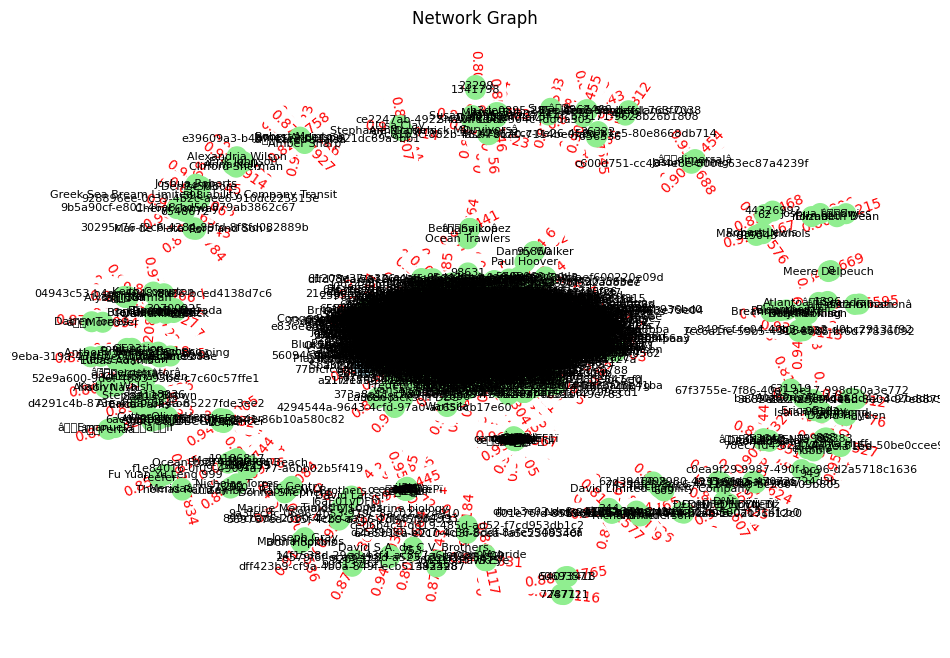

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import mpldatacursor

# Assuming graph is the NetworkX graph object containing the data

# Create a figure and axis
fig, ax = plt.subplots()

# Create the layout for the graph
pos = nx.spring_layout(graph)

# Draw the nodes and edges
nx.draw_networkx_nodes(graph, pos, ax=ax, node_color='lightblue', node_size=200)
nx.draw_networkx_edges(graph, pos, ax=ax, edge_color='gray')

# Add labels to the nodes
labels = nx.get_node_attributes(graph, 'id')
nx.draw_networkx_labels(graph, pos, labels, font_size=8, ax=ax)

# Enable interactivity with cursors
mpldatacursor.datacursor(hover=True, point_labels={obj: labels[obj] for obj in graph})

# Configure the plot appearance
ax.set_title("Interactive Network Graph")
ax.set_xticks([])
ax.set_yticks([])

# Enable zooming and panning
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.autoscale(enable=True, tight=True)
ax.margins(0.1, 0.1)
ax.invert_yaxis()

# Display the plot
plt.show()
